## W1-pOEx workflow with HIS-TAG


Activating silent BGCs is a highly sought-after endeavor, and our goal was to develop a method for overexpressing regulators.


 This approach has proven effective in activating silent BGCs and enhancing the yields of natural products in streptomyces23–25. To achieve this, we sought a rapid and standardized workflow for overexpressing regulators and devised a plasmid system called pOEX-PkasO (Figure 2A). This system is based on the integrative plasmid pRM4,  described by Menges et. al 200726, but incorporates one of the strongest known promoters engineered in Streptomyces namely PkasO27 along with the canonical RBS sequence “GGAGG”28. The system was experimentally verified and the results can be found in the section “Example usage of workflow 1”. 


 ## Adding a his-tag to your gene targets: 

 In this workflow we have added a few lines of code that makes it possible to add histags to your genes of interest. We use the same genes as in the original worklfow to make it simple. 

 This can also be done in the webapp but you need to have removed the stop-codon from ur sequences and reverse-complement the his-tag.



In [1]:
import sys
import os

# Ensure the src directory is in the Python path
# Assuming your notebooks are in a subdirectory of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Importing necessary libraries
from Bio.Restriction import StuI
from datetime import datetime


# Importing from custom modules
from streptocad.primers.primer_analysis import analyze_primers_and_hairpins
from streptocad.cloning.plasmid_processing import assemble_and_process_plasmids
from streptocad.cloning.pcr_simulation import perform_pcr_on_sequences
from streptocad.sequence_loading.sequence_loading import load_and_process_plasmid, load_and_process_genome_sequences
from streptocad.utils import polymerase_dict, extract_metadata_to_dataframe, ProjectDirectory
from streptocad.primers.primer_generation import generate_primer_dataframe, create_idt_order_dataframe


# Inputs


In [2]:
# Inputs
# 1 files to incorporate into the pOEX-PKasO (genbank, fasta)
# data/data_for_tf_activation_project/GOE_regulators/GOE_regulators.gb
path_to_file = '../../data/data_for_tf_activation_project/GOE_regulators/GOE_regulators.gb'
clean_seq = load_and_process_genome_sequences(path_to_file)

# 2 Add plasmid 
path_to_plasmid = '../../data/plasmids/pOEX-PkasO.gb'
clean_plasmid = load_and_process_plasmid(path_to_plasmid)

# 3 Choose overlapping sequences for our plasmid we can use the following
up_homology = "GGCGAGCAACGGAGGTACGGACAGG".upper()
dw_homology = "CGCAAGCCGCCACTCGAACGGAAGG".upper()

#### Advanced settings ####
# 4 Choose polymerase and target melting temperature
chosen_polymerase = 'Q5 High-Fidelity 2X Master Mix'
melting_temperature = 69
primer_concentration = 0.5 
primer_number_increment = 1

/Users/lucaslevassor/opt/anaconda3/envs/streptocad/lib/python3.11/site-packages/Bio/GenBank/Scanner.py:1529: BiopythonParserWarning: Attempting to parse malformed locus line:
'LOCUS       pOEX-PkasO        5230 bp DNA     circular SYN 06-DEC-2023\n'
Found locus 'pOEX-PkasO' size '5230' residue_type 'DNA'
Some fields may be wrong.
  warnings.warn(


### How to add a his-tag to your gene-product

We can add the HIS-tag by adding it to the 5' end of reverse primer. Like i do it below: 

In [3]:
from Bio.Seq import Seq
# His-tage with stop codon
his_tag = str(Seq('CACCATCACCATCACCATTAG').reverse_complement().upper())
dw_homology =  dw_homology+ his_tag # remember we want it between the homology and the gene-specific part of the sequence
dw_homology


'CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG'

We also have to remove the stop-codon from the sequence which can be done like this: 

In [4]:
# sequences before
clean_seq

[Dseqrecord(-813),
 Dseqrecord(-2859),
 Dseqrecord(-636),
 Dseqrecord(-2319),
 Dseqrecord(-822),
 Dseqrecord(-1353),
 Dseqrecord(-654),
 Dseqrecord(-813),
 Dseqrecord(-609),
 Dseqrecord(-648),
 Dseqrecord(-786),
 Dseqrecord(-888),
 Dseqrecord(-3420),
 Dseqrecord(-1830),
 Dseqrecord(-1221),
 Dseqrecord(-2421),
 Dseqrecord(-2916),
 Dseqrecord(-2304)]

In [5]:
# sequences after we change the stop-codon
clean_seq = [seq[:-3] for seq in clean_seq]
clean_seq

[Dseqrecord(-810),
 Dseqrecord(-2856),
 Dseqrecord(-633),
 Dseqrecord(-2316),
 Dseqrecord(-819),
 Dseqrecord(-1350),
 Dseqrecord(-651),
 Dseqrecord(-810),
 Dseqrecord(-606),
 Dseqrecord(-645),
 Dseqrecord(-783),
 Dseqrecord(-885),
 Dseqrecord(-3417),
 Dseqrecord(-1827),
 Dseqrecord(-1218),
 Dseqrecord(-2418),
 Dseqrecord(-2913),
 Dseqrecord(-2301)]

Notice that the stop codon has been removed from the sequences. All the Dseqrecords are 3 nucleotides shorter than the original sequences.

# Outputs

In [6]:
# 1 Table with overview of primers and their analysis
primer_df = generate_primer_dataframe(clean_seq, 
                                      melting_temperature, 
                                      polymerase_dict[chosen_polymerase], 
                                      primer_concentration,
                                      up_homology, dw_homology)
primer_df

,template,f_primer_anneal(5-3),r_primer_anneal(5-3),f_tm,r_tm,ta,f_primer_sequences(5-3),r_primer_sequences(5-3),f_primer_name,r_primer_name
0,part_LLPMBPKK_00,GTGACCCAGCCCGCC,TTCGGCGGCGGAGCTG,71,72,72,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_00,primer_rev_part_LLPMBPKK_00
1,part_LLPMBPKK_00,ATGATGAAGGGGATGCCGCC,GCCGGAGTCGGTGCGC,71,74,72,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGCC,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_00,primer_rev_part_LLPMBPKK_00
2,part_LLPMBPKK_00,GTGACCGACACCCCCATC,GCGGCGGATGAGGCC,69,71,70,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCCATC,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_00,primer_rev_part_LLPMBPKK_00
3,part_LLPMBPKK_01,ATGGGCCGTGTGAGCGG,TCGGTTCCCCTCTTCTGCGAG,72,72,72,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGCGG,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_01,primer_rev_part_LLPMBPKK_01
4,part_LLPMBPKK_02,GTGGCTCTGTTCCACATGCTCG,TGCAAGGGTCGGGAACG,71,68,69,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATGCTCG,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02
5,part_LLPMBPKK_02,GTGGAAGTTATGGAACGGGGG,GGACCTGAGCCGGGG,68,69,69,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGGGGG,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02
6,part_LLPMBPKK_02,GTGCGTGTTGTCCTAGCCGAAG,GCGGTCCCGGTCCAG,71,70,71,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGCCGAAG,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02
7,part_LLPMBPKK_02,ATGGCGCATCTGGACATCGG,CAGCGGGGCCAGCG,71,72,72,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACATCGG,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02
8,part_LLPMBPKK_02,GTGATTCGGATCCTGCTCGCAGAA,GACCAGCCAGCCCGC,71,71,72,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTCGCAGAA,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02
9,part_LLPMBPKK_02,ATGACCGACACCGACAACGACC,GGAGCGGGCGAGAAGGC,72,73,72,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACAACGACC,CGCAAGCCGCCACTCGAACGGAAGGCTAATGGTGATGGTGATGGTG...,primer_fwd_part_LLPMBPKK_02,primer_rev_part_LLPMBPKK_02


## Simulating the PCRs

In [7]:
list_of_amplicons = perform_pcr_on_sequences(primer_df, 
                                             clean_seq)

part_LLPMBPKK_00_amplicon , Length: 881
                         5GTGACCCAGCCCGCC...CAGCTCCGCCGCCGAA3
                                            ||||||||||||||||
                                           3GTCGAGGCGGCGGCTTGTGGTAGTGGTAGTGGTAATCGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC3
                          |||||||||||||||
                         3CACTGGGTCGGGCGG...GTCGAGGCGGCGGCTT5

part_LLPMBPKK_00_amplicon , Length: 2927
                         5ATGATGAAGGGGATGCCGCC...GCGCACCGACTCCGGC3
                                                 ||||||||||||||||
                                                3CGCGTGGCTGAGGCCGGTGGTAGTGGTAGTGGTAATCGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGCC3
                          ||||||||||||||||||||
                         3TACTACTTCCCCTACGGCGG...CGCGTGGCTGAGGCCG5

part_LLPMBPKK_00_amplicon , Length: 704
                         5GTGACCGACACCCCCATC...GGCCTCATCCGCCGC3
                           

In [8]:
list_of_amplicons[0].figure()

                         5GTGACCCAGCCCGCC...CAGCTCCGCCGCCGAA3
                                            ||||||||||||||||
                                           3GTCGAGGCGGCGGCTTGTGGTAGTGGTAGTGGTAATCGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC3
                          |||||||||||||||
                         3CACTGGGTCGGGCGG...GTCGAGGCGGCGGCTT5

In [9]:
# 2 Ready made IDT format
idt_df = create_idt_order_dataframe(primer_df, concentration="25nm", purification="STD")
idt_df

,Name,Sequence,Concentration,Purification
0,primer_fwd_part_LLPMBPKK_00,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,25nm,STD
1,primer_fwd_part_LLPMBPKK_00,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGCC,25nm,STD
2,primer_fwd_part_LLPMBPKK_00,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCCATC,25nm,STD
3,primer_fwd_part_LLPMBPKK_01,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGCGG,25nm,STD
4,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATGCTCG,25nm,STD
5,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGGGGG,25nm,STD
6,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGCCGAAG,25nm,STD
7,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACATCGG,25nm,STD
8,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTCGCAGAA,25nm,STD
9,primer_fwd_part_LLPMBPKK_02,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACAACGACC,25nm,STD


In [10]:
# 3 analyzed primers
analyzed_primers = analyze_primers_and_hairpins(primer_df)
analyzed_primers

Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_00 & primer_rev_part_LLPMBPKK_00 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_00 & primer_rev_part_LLPMBPKK_00 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_00 & primer_rev_part_LLPMBPKK_00 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_01 & primer_rev_part_LLPMBPKK_01 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_02 & primer_rev_part_LLPMBPKK_02 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_02 & primer_rev_part_LLPMBPKK_02 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_02 & primer_rev_part_LLPMBPKK_02 due to length constraints.
Skipping analysis for primer pair primer_fwd_part_LLPMBPKK_02 & primer_rev_part_LLPMBPKK_02 due to length constraints.
Skipping analysis for primer pair primer_fwd_par

,annealing_temperature,primer_pair,homodimer_forward_tm,homodimer_forward_deltaG (kcal/mol),homodimer_reverse_tm,homodimer_reverse_deltaG (kcal/mol),heterodimer_tm,heterodimer_deltaG (kcal/mol),hairpin_forward_structure_found,hairpin_forward_tm,hairpin_forward_deltaG (kcal/mol),hairpin_reverse_structure_found,hairpin_reverse_tm,hairpin_reverse_deltaG (kcal/mol),f_tm,r_tm
0,72,primer_fwd_part_LLPMBPKK_02 & primer_rev_part_...,10.831736,-1.797770,27.286390,5.913884,25.612535,1.973838,False,0.000000,0.000000,False,0.000000,0.000000,71,72
1,72,primer_fwd_part_LLPMBPKK_05 & primer_rev_part_...,24.786298,11.669328,28.709504,14.164721,16.034890,0.252718,False,0.000000,0.000000,False,0.000000,0.000000,71,71
2,72,primer_fwd_part_LLPMBPKK_06 & primer_rev_part_...,18.882375,4.870894,38.933710,-3.221049,19.494565,6.088304,False,0.000000,0.000000,False,0.000000,0.000000,71,72
3,72,primer_fwd_part_LLPMBPKK_06 & primer_rev_part_...,22.763132,18.566935,36.601456,-2.447539,28.010646,12.554361,False,0.000000,0.000000,False,0.000000,0.000000,71,72
4,71,primer_fwd_part_LLPMBPKK_07 & primer_rev_part_...,28.325668,4.824080,27.841094,-0.945380,19.165911,2.520788,False,0.000000,0.000000,True,75.674554,-0.469031,70,71
5,72,primer_fwd_part_LLPMBPKK_07 & primer_rev_part_...,28.992815,12.769855,27.286390,5.913884,16.034890,0.252718,False,0.000000,0.000000,True,78.031563,-0.377851,71,71
6,72,primer_fwd_part_LLPMBPKK_07 & primer_rev_part_...,33.353916,3.985565,35.101187,13.015527,33.272703,-1.283635,True,68.503698,0.161689,False,0.000000,0.000000,74,73


part_LLPMBPKK_00_amplicon
part_LLPMBPKK_00_amplicon
part_LLPMBPKK_00_amplicon
part_LLPMBPKK_01_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_02_amplicon
part_LLPMBPKK_05_amplicon
part_LLPMBPKK_06_amplicon
part_LLPMBPKK_06_amplicon
part_LLPMBPKK_06_amplicon
part_LLPMBPKK_07_amplicon
part_LLPMBPKK_07_amplicon
part_LLPMBPKK_07_amplicon


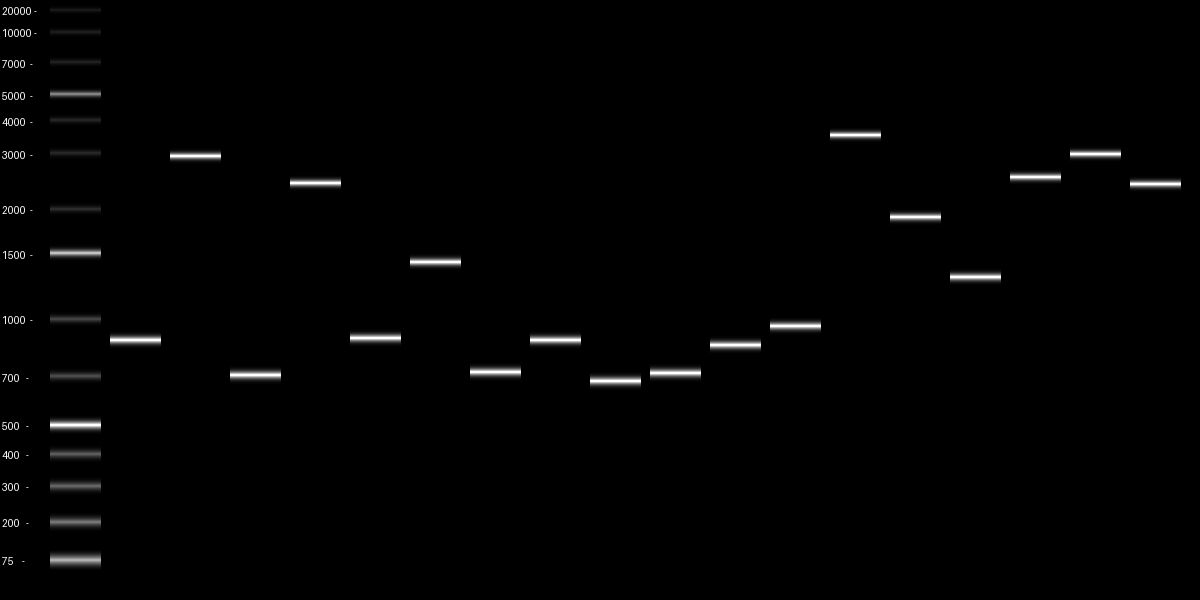

In [11]:
from pydna.gel import gel
from pydna.ladders import GeneRuler_1kb_plus

bands = list_of_amplicons
for band in bands:
    print(band.name)

gel([GeneRuler_1kb_plus, *[[band] for band in bands]])

In [12]:
# 3 Assembled plasmid genbank files
assembled_plasmids, assembly_results = assemble_and_process_plasmids(clean_plasmid, list_of_amplicons, 
                              enzymes=[StuI], 
                              save_plasmids=False, 
                              save_path="../../data/plasmids/pOEX_overexpression_plasmids")

########### ENZYMMMMMEEES [StuI]
########### ENZYMMMMMEEES [StuI]


In [13]:
assembly_results

[Contig(o6061),
 Contig(o8107),
 Contig(o5884),
 Contig(o7567),
 Contig(o6070),
 Contig(o6601),
 Contig(o5902),
 Contig(o6061),
 Contig(o5857),
 Contig(o5896),
 Contig(o6034),
 Contig(o6136),
 Contig(o8668),
 Contig(o7078),
 Contig(o6469),
 Contig(o7669),
 Contig(o8164),
 Contig(o7552)]

In [14]:
assembled_plasmids

[Dseqrecord(o6061),
 Dseqrecord(o8107),
 Dseqrecord(o5884),
 Dseqrecord(o7567),
 Dseqrecord(o6070),
 Dseqrecord(o6601),
 Dseqrecord(o5902),
 Dseqrecord(o6061),
 Dseqrecord(o5857),
 Dseqrecord(o5896),
 Dseqrecord(o6034),
 Dseqrecord(o6136),
 Dseqrecord(o8668),
 Dseqrecord(o7078),
 Dseqrecord(o6469),
 Dseqrecord(o7669),
 Dseqrecord(o8164),
 Dseqrecord(o7552)]

In [15]:
amplicon_names = [seq.name for seq in list_of_amplicons]
plasmid_metadata_df = extract_metadata_to_dataframe(assembled_plasmids,
                                                    clean_plasmid,
                                                    amplicon_names)

plasmid_metadata_df

,plasmid_name,date,original_plasmid,integration,size
0,pOEx-KasO_part_LLPMBPKK_00_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_00_amplicon,6061
1,pOEx-KasO_part_LLPMBPKK_00_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_00_amplicon,8107
2,pOEx-KasO_part_LLPMBPKK_00_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_00_amplicon,5884
3,pOEx-KasO_part_LLPMBPKK_01_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_01_amplicon,7567
4,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,6070
5,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,6601
6,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,5902
7,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,6061
8,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,5857
9,pOEx-KasO_part_LLPMBPKK_02_amplicon,2025-06-11,pOEX-PkasO,part_LLPMBPKK_02_amplicon,5896


## Folder with all the generated I/O

In [16]:


input_files = [
    {"name": "input_sequences.gb", "content": clean_seq},
    {"name": "input_plasmid.gb", "content": clean_plasmid}
]

output_files = [
    {"name": "pOEX-PKasO.gb", "content": assembled_plasmids}, # LIST OF Dseqrecords
    {"name": "primer_df.csv", "content": primer_df},
    {"name": "full_idt.csv", "content": idt_df},
    {"name": "primers_analyzed.csv", "content": analyzed_primers},
    {"name": "plasmid_metadata_df.csv", "content": plasmid_metadata_df},

]

input_values = {
    "polymerase_settings": {
        "chosen_polymerase": chosen_polymerase,
        "melting_temperature": melting_temperature,
        "primer_concentration": primer_concentration,
        "primer_number_increment": primer_number_increment,
    },

    "overlapping_sequences": {
        "up_homology": str(up_homology),
        "dw_homology": str(dw_homology)
    }
}

# Paths to Markdown files
markdown_file_paths = [
    "../../protocols/conjugation_protcol.md",
    "../../overexpression_protocol.md",
]

# Data and time
timestamp = datetime.utcnow().isoformat()

project_name=f"pOEX-PKasO_workflow_{timestamp}"
# Create project directory structure
project_directory = ProjectDirectory(
    project_name=project_name,
    input_files=input_files,
    output_files=output_files,
    input_values=input_values,
    markdown_file_paths=markdown_file_paths
)


# DO You want to save the folder? 
save_zip_folder = False 

if save_zip_folder: 
    # Generate the project directory structure and get the zip content
    zip_content = project_directory.create_directory_structure(create_directories=False)

    # Save the zip file to disk (optional)
    with open("project_structure.zip", "wb") as f:
        f.write(zip_content)

## Notebook finished. 